In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:\\Users\\MSI\\Desktop\\Demand Restaurant\\train.csv")
test = pd.read_csv("C:\\Users\\MSI\\Desktop\\Demand Restaurant\\test.csv")

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [5]:
train.shape

(456548, 9)

In [6]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [7]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
meal_info = pd.read_csv("C:\\Users\\MSI\\Desktop\\Demand Restaurant\\meal_info.csv")
center_info = pd.read_csv("C:\\Users\\MSI\\Desktop\\Demand Restaurant\\fulfilment_center_info.csv")

In [9]:
df = pd.merge(train, meal_info, on="meal_id", how="outer")
df = pd.merge(df, center_info, on="center_id", how="outer")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [10]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [11]:
df = df[['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area', 'num_orders']]

In [12]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,177
1,1018704,2,55,1885,135.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,323
2,1196273,3,55,1885,132.92,133.92,0,0,Beverages,Thai,647,56,TYPE_C,2.0,96
3,1116527,4,55,1885,135.86,134.86,0,0,Beverages,Thai,647,56,TYPE_C,2.0,163
4,1343872,5,55,1885,146.50,147.50,0,0,Beverages,Thai,647,56,TYPE_C,2.0,215


In [13]:
df = df.drop(["id", "center_id", "meal_id"], axis = 1)

In [14]:
df.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_orders
0,1,136.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,177
1,2,135.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,323
2,3,132.92,133.92,0,0,Beverages,Thai,647,56,TYPE_C,2.0,96
3,4,135.86,134.86,0,0,Beverages,Thai,647,56,TYPE_C,2.0,163
4,5,146.50,147.50,0,0,Beverages,Thai,647,56,TYPE_C,2.0,215


[Text(0, 0.5, 'count'), Text(0.5, 0, 'number of orders')]

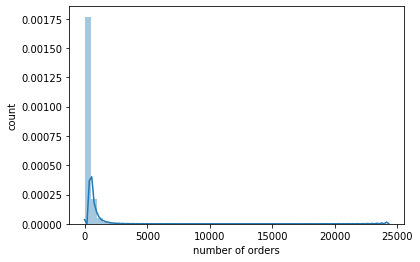

In [15]:
sns.distplot(df['num_orders'], norm_hist=False, kde=True).set(xlabel='number of orders', ylabel='count')

In [16]:
df = df[df['num_orders'] < 2000 ]
df.reset_index(drop=True).head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_orders
0,1,136.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,177
1,2,135.83,152.29,0,0,Beverages,Thai,647,56,TYPE_C,2.0,323
2,3,132.92,133.92,0,0,Beverages,Thai,647,56,TYPE_C,2.0,96
3,4,135.86,134.86,0,0,Beverages,Thai,647,56,TYPE_C,2.0,163
4,5,146.50,147.50,0,0,Beverages,Thai,647,56,TYPE_C,2.0,215


In [17]:
df.shape

(453148, 12)

[Text(0, 0.5, 'count'), Text(0.5, 0, 'number of orders')]

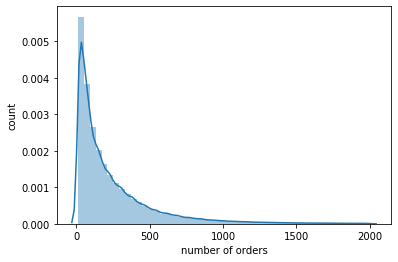

In [18]:
sns.distplot(df['num_orders'], norm_hist=False, kde=True).set(xlabel='number of orders', ylabel='count')

In [19]:
numerical_features = df.select_dtypes([np.number]).columns.tolist()

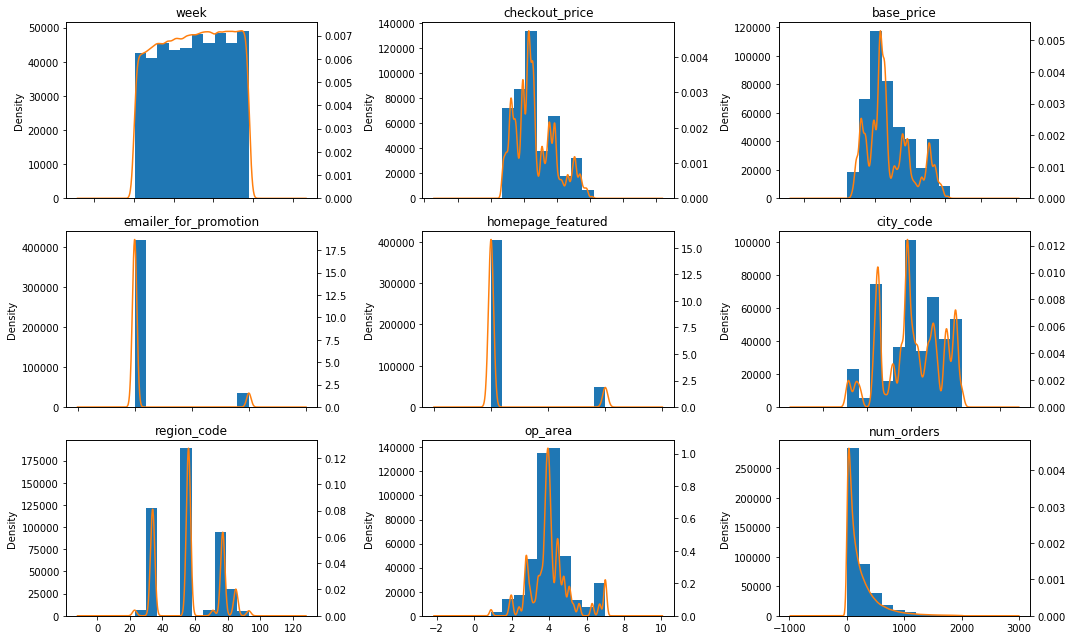

In [20]:
k = len(df[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 ## Floor Division (also called Integer Division)
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

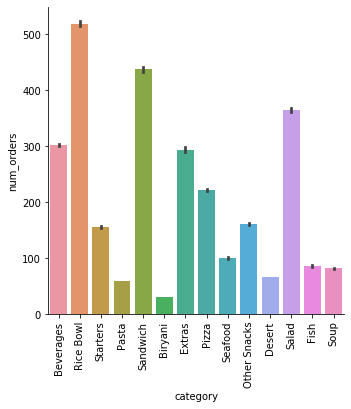

In [21]:
g = sns.catplot(x="category", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

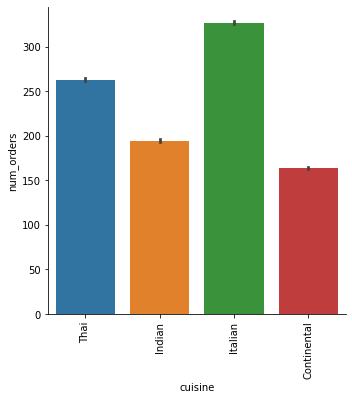

In [22]:
g = sns.catplot(x="cuisine", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

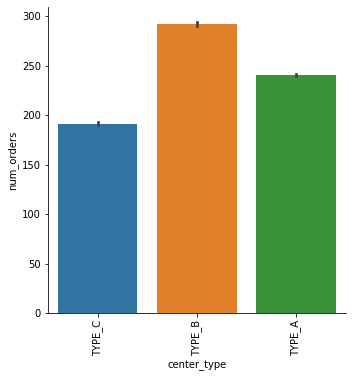

In [23]:
g = sns.catplot(x="center_type", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

In [24]:
df.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code',
       'center_type', 'op_area', 'num_orders'],
      dtype='object')

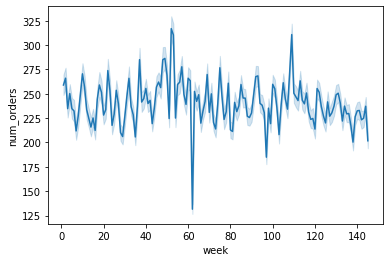

In [25]:
g = sns.lineplot(x="week", y="num_orders", data=df)

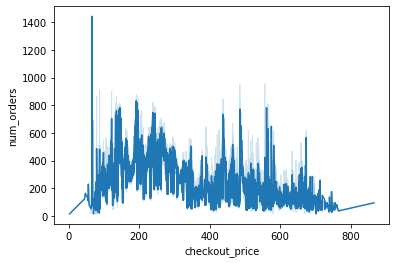

In [26]:
g = sns.lineplot(x="checkout_price", y="num_orders", data=df)

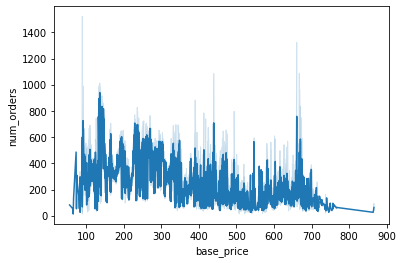

In [27]:
g = sns.lineplot(x="base_price", y="num_orders", data=df)

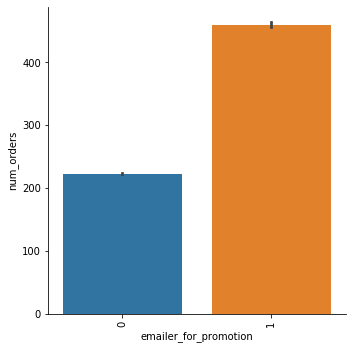

In [28]:
g = sns.catplot(x="emailer_for_promotion", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

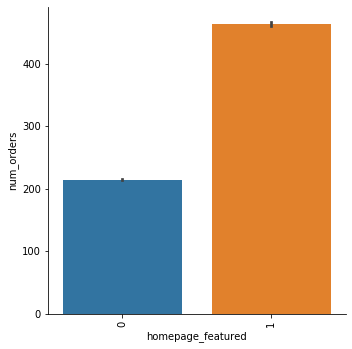

In [29]:
g = sns.catplot(x="homepage_featured", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

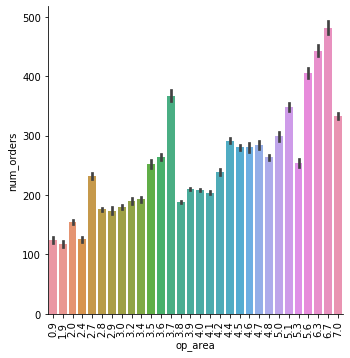

In [30]:
g = sns.catplot(x="op_area", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

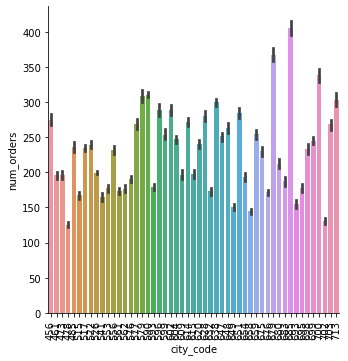

In [31]:
g = sns.catplot(x="city_code", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

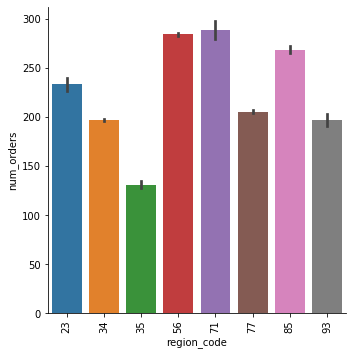

In [32]:
g = sns.catplot(x="region_code", y="num_orders", kind="bar", data=df)
g.set_xticklabels(rotation=90)

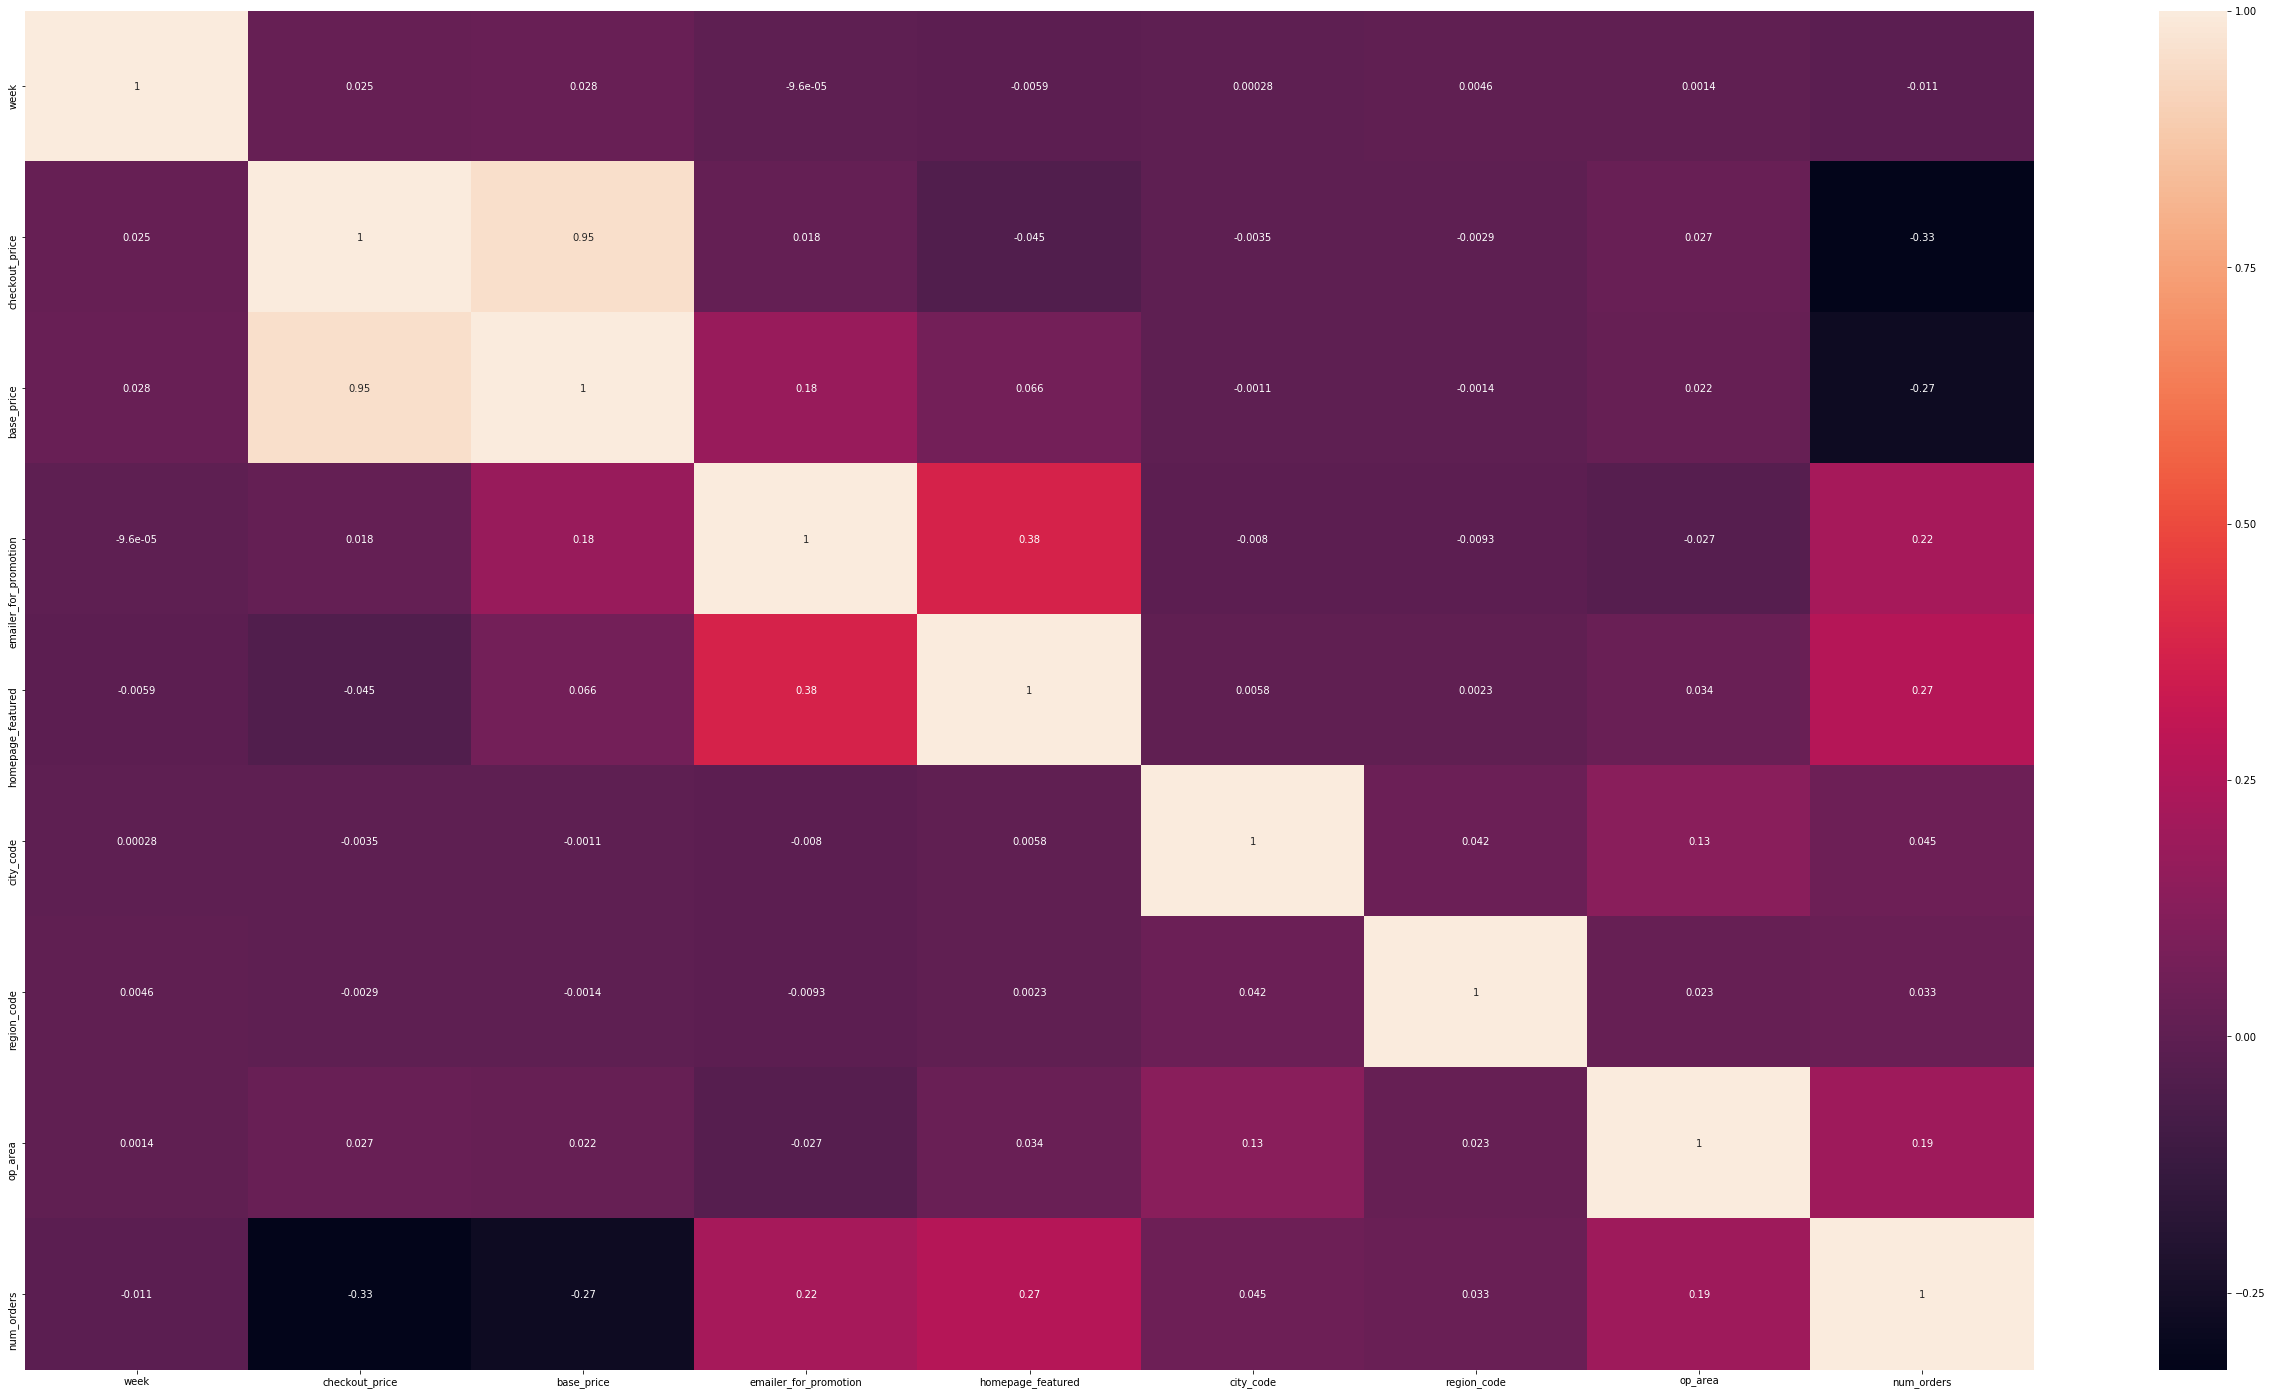

In [33]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

In [34]:
df["category"].unique()

array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [35]:
df["cuisine"].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [36]:
df["center_type"].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [38]:
df['center_type'] = lb.fit_transform(df['center_type'])

In [39]:
df['category'] = lb.fit_transform(df['category'])

In [40]:
df['cuisine'] = lb.fit_transform(df['cuisine'])

In [41]:
df.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,num_orders
0,1,136.83,152.29,0,0,0,3,647,56,2,2.0,177
1,2,135.83,152.29,0,0,0,3,647,56,2,2.0,323
2,3,132.92,133.92,0,0,0,3,647,56,2,2.0,96
3,4,135.86,134.86,0,0,0,3,647,56,2,2.0,163
4,5,146.50,147.50,0,0,0,3,647,56,2,2.0,215


In [42]:
x = df.drop(["num_orders"], axis = 1)
y = df["num_orders"]

In [43]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [44]:
from sklearn import metrics
def train(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    mse = metrics.mean_squared_error(y_train, y_train_pred)
    r2 = metrics.r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = metrics.mean_squared_error(y_test, y_test_pred)
    r2 = metrics.r2_score(y_test, y_test_pred)
    print('For validation data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

For training data, mean squared error: 61404.0939, R2: 0.2533
For validation data, mean squared error: 61586.9167, R2: 0.2525


In [46]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.5)
train(rr)

For training data, mean squared error: 61404.0939, R2: 0.2533
For validation data, mean squared error: 61586.9176, R2: 0.2525


In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
train(lasso)

For training data, mean squared error: 61404.4041, R2: 0.2533
For validation data, mean squared error: 61587.5171, R2: 0.2525


In [48]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=150)
train(cls)

For training data, mean squared error: 2363.3623, R2: 0.9713
For validation data, mean squared error: 16610.6873, R2: 0.7984


In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
KNN = KNeighborsRegressor()
train(KNN)

For training data, mean squared error: 20345.8810, R2: 0.7526
For validation data, mean squared error: 31339.7712, R2: 0.6196


In [51]:
GB = GradientBoostingRegressor() 
train(GB)

For training data, mean squared error: 32232.0273, R2: 0.6081
For validation data, mean squared error: 32164.4131, R2: 0.6096


In [52]:
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [53]:
model = Sequential()

# The Input Layer :
model.add(Dense(8, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [63]:
history = model.fit(x_train, y_train, epochs=2000, batch_size=256, verbose=1)

Epoch 1/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23402.8038 - mse: 23402.8184 - mae: 93.8168
Epoch 2/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23388.7160 - mse: 23388.7305 - mae: 93.8760
Epoch 3/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23405.4639 - mse: 23405.4453 - mae: 93.8187
Epoch 4/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23571.0250 - mse: 23571.0273 - mae: 94.1164
Epoch 5/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23215.0036 - mse: 23214.9961 - mae: 93.4788
Epoch 6/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23299.1656 - mse: 23299.1797 - mae: 93.6766
Epoch 7/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23316.4031 - mse: 23316.3965 - mae: 93.7315
Epoch 8/2000
317203/317203 [==============================] - 3s 10us/step - loss: 23296.9286 - mse: 23296.9355

In [64]:
y_pred = model.predict(x_test)

In [65]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rsquared = metrics.r2_score(y_test, y_pred)

In [66]:
model_stat_dict = {
    'Mean Absolute Error': [mae],
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'R-squared score': [rsquared]
}

In [67]:
model_stat = pd.DataFrame(model_stat_dict)
model_stat

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared score
0,86.392109,20610.985781,143.565267,0.749854


In [69]:
final_df = pd.DataFrame()
final_df["Actual"] = y_test
final_df["Predicted"] = y_pred